# Regression Keras

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Create a Regression Dataset with 10 columns

In [2]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [3]:
from sklearn.datasets import make_regression
X, Y = make_regression(n_samples=2000, n_features=15, noise=10, random_state=42)

In [4]:
X.shape

(2000, 15)

In [5]:
X

array([[-1.17696211,  1.19311295, -0.2215366 , ...,  0.78400278,
         1.02151539, -0.98453405],
       [ 1.69505104, -1.40631746,  0.04360245, ..., -0.42930222,
        -0.08310557, -0.61176909],
       [-0.1382643 , -0.46341769,  0.49671415, ..., -0.46947439,
        -0.46572975,  1.57921282],
       ...,
       [ 0.05946593,  0.60608518, -1.45596504, ...,  1.2924069 ,
        -0.72547532,  1.46572641],
       [-1.1859422 ,  0.13408869,  0.23743766, ...,  0.61696884,
         0.93397432,  0.82805822],
       [ 0.22084177,  0.61657935, -0.033068  , ...,  0.16342782,
        -1.30709834,  0.32982306]])

In [6]:
Y.shape

(2000,)

In [7]:
Y

array([ -42.09237112,    7.59948313,  259.34233549, ..., -212.43549359,
       -306.92429931,  -13.74320147])

### Save above X and Y in DataFrame format

In [8]:
cols = [f'x{i+1}' for i in range(15)]
cols

['x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15']

In [9]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
X = pd.DataFrame(X)
X.columns = cols
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,-1.176962,1.193113,-0.221537,0.918915,-0.188261,0.209470,-0.459657,-1.079842,1.820544,-0.566395,0.831617,-0.005955,0.784003,1.021515,-0.984534
1,1.695051,-1.406317,0.043602,-1.504720,-0.692421,-1.320023,0.760056,0.082440,-0.622649,0.194607,-0.742471,-0.037037,-0.429302,-0.083106,-0.611769
2,-0.138264,-0.463418,0.496714,0.241962,0.542560,-0.234137,-1.913280,-1.724918,0.647689,1.523030,-0.234153,0.767435,-0.469474,-0.465730,1.579213
3,0.616664,0.609880,1.260850,0.794923,-0.310938,-1.075737,1.349135,1.058170,0.087974,-0.440275,-0.528998,-2.120087,-0.736064,-0.039926,-0.431456
4,0.626614,1.481961,-0.248616,-0.565576,-0.802280,2.154929,-0.471316,0.718417,0.045564,0.623407,0.703440,-0.941023,0.246084,-0.283218,-0.315297


In [11]:
Y = pd.DataFrame(Y)
Y.columns = ['y']
Y.head()

,y
0,-42.092371
1,7.599483
2,259.342335
3,-116.773129
4,26.679849


### Apply Preprocessing on X

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [13]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())]).set_output(transform='pandas')

In [14]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,-1.199293,1.155898,-0.193221,0.933054,-0.182677,0.216018,-0.456107,-1.092772,1.824932,-0.574044,0.841678,0.017024,0.857201,0.971209,-1.009416
1,1.712028,-1.410221,0.064642,-1.469889,-0.692999,-1.301829,0.754315,0.081054,-0.652243,0.185379,-0.767294,-0.013752,-0.396293,-0.122887,-0.633136
2,-0.146379,-0.479405,0.505319,0.261881,0.557078,-0.224211,-1.898657,-1.744255,0.635764,1.511046,-0.247711,0.782780,-0.437795,-0.501865,1.578510
3,0.618882,0.580139,1.248484,0.810121,-0.306853,-1.059403,1.338907,1.066475,0.068264,-0.448186,-0.549091,-2.076242,-0.713215,-0.080119,-0.451122
4,0.628967,1.441044,-0.219557,-0.538763,-0.804201,2.146665,-0.467677,0.723348,0.025264,0.613289,0.710661,-0.908815,0.301464,-0.321092,-0.333867


### Apply Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=21)

In [16]:
xtrain.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
1490,-0.060969,1.223370,-1.117881,1.699192,0.950085,-0.125100,-1.187772,-0.414699,-1.696158,-0.240983,-0.459524,-1.469880,-0.331248,2.375518,-0.580194
965,-1.052313,2.341753,-1.178398,-0.658868,0.732369,-1.218581,1.611564,0.384769,-0.467316,1.276579,0.006462,0.746705,0.603499,2.123701,1.250572
1216,-0.584369,0.179143,0.230313,-0.479413,0.455451,0.699323,0.522285,0.015527,1.589255,-0.591205,-1.169224,-0.514301,0.150775,0.413993,0.446454
500,0.670129,1.045534,-1.873852,-0.815506,0.884143,-0.836162,1.305848,0.650962,0.976485,-1.344771,-0.913665,-0.454043,0.297868,-0.870413,-0.751260
403,0.722022,0.265715,-1.739688,0.175313,-0.184968,1.635613,0.490804,-1.143954,0.205189,0.001642,-1.439453,0.551279,-1.455512,0.283386,-0.523701


In [17]:
ytrain.head()

,y
1490,-356.925477
965,8.515626
1216,-44.958454
500,-218.346383
403,-211.774828


In [18]:
xtest.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
541,0.017174,0.487604,-1.858775,-0.583974,-0.387295,-0.065636,-0.523923,1.364303,0.612662,0.184223,1.330525,0.609403,0.149833,-0.686883,-0.201889
1211,1.989584,0.520781,-0.663736,0.289728,0.366811,-0.105800,1.388020,-0.255551,-0.678308,-1.673148,0.870878,-0.517249,1.980942,0.120493,-0.321497
1862,1.994875,0.765938,1.021518,1.917269,0.849549,1.450914,-0.636232,-0.269903,0.361577,-0.195664,1.047174,-0.691528,0.190685,-1.451170,-0.500088
1094,-0.494729,0.040776,0.493296,-0.968645,-0.514568,0.181483,0.370887,1.480873,-0.019259,0.932903,-0.074686,-0.044944,-2.031415,0.719149,-1.566040
465,-1.786021,1.009215,-0.839413,1.409137,-0.067810,0.024226,0.616150,-0.626137,-2.015388,-1.476154,1.383343,0.554112,0.105274,0.104032,0.490380


In [19]:
ytest.head()

,y
541,-7.918092
1211,91.934687
1862,259.032574
1094,-191.626509
465,-196.558008


In [20]:
xtrain.shape

(1600, 15)

In [21]:
xtest.shape

(400, 15)

### Build Neural Network

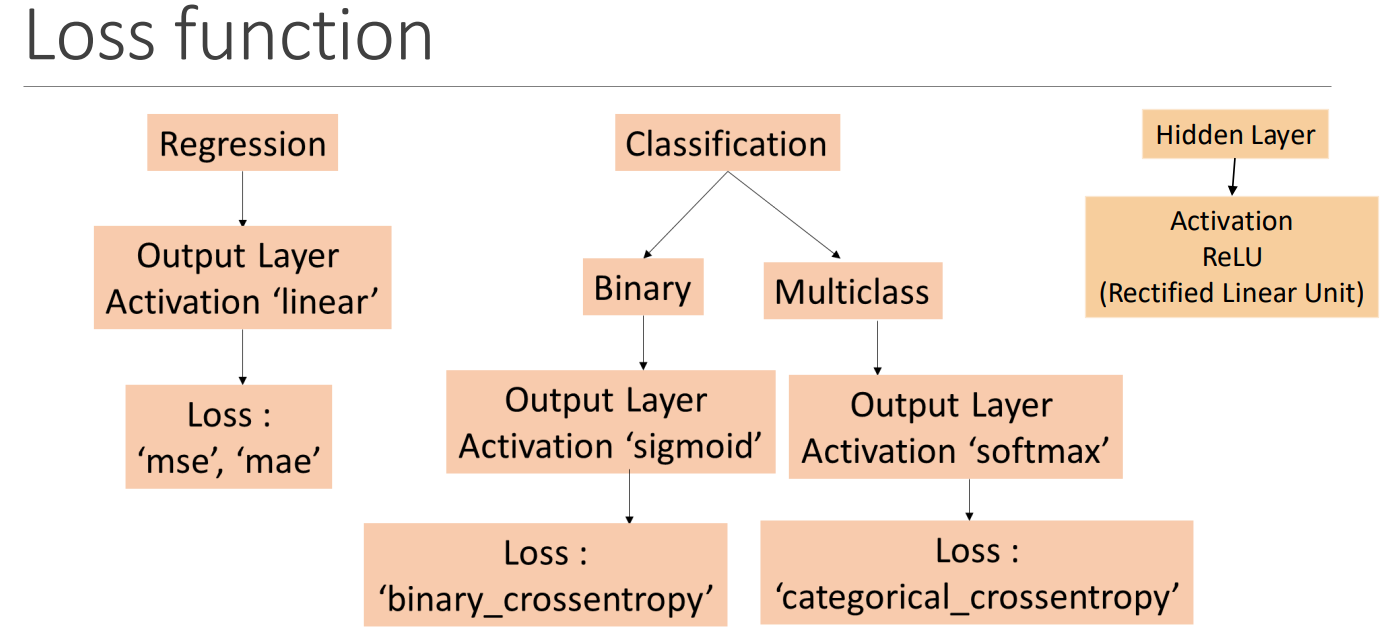

In [22]:
%pip install keras
%pip install tensorflow



Note: you may need to restart the kernel to use updated packages.


In [23]:
from keras.models import Sequential
from keras.layers import Dense

In [24]:
# Initialize neural Network
model = Sequential()

# Add first hidden layer
model.add(Dense(units=32, activation='relu', input_shape = (xtrain.shape[1],)))
# Add second hidden layer
model.add(Dense(units=16, activation='relu'))
# Output layer
model.add(Dense(units=1, activation='linear'))

### Compile the model

In [25]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

### Train the Neural Network

In [26]:
hist = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=100)

Epoch 1/100


50/50 [==============================] - 2s 10ms/step - loss: 32959.0898 - mae: 144.3709 - val_loss: 32116.3008 - val_mae: 145.1274
Epoch 2/100
50/50 [==============================] - 0s 4ms/step - loss: 32620.1855 - mae: 143.6071 - val_loss: 31634.9746 - val_mae: 143.9942
Epoch 3/100
50/50 [==============================] - 0s 4ms/step - loss: 31787.3945 - mae: 141.6467 - val_loss: 30443.4570 - val_mae: 141.1182
Epoch 4/100
50/50 [==============================] - 0s 4ms/step - loss: 29917.0430 - mae: 137.1086 - val_loss: 27965.3848 - val_mae: 134.8961
Epoch 5/100
50/50 [==============================] - 0s 4ms/step - loss: 26462.4746 - mae: 128.2419 - val_loss: 23792.5273 - val_mae: 123.5818
Epoch 6/100
50/50 [==============================] - 0s 4ms/step - loss: 21294.2051 - mae: 114.0067 - val_loss: 18156.5645 - val_mae: 106.4528
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 15129.6338 - mae: 94.0080 - val_loss: 11966.0078 - val_mae: 83.985

### Visualizing the learning curve

In [27]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


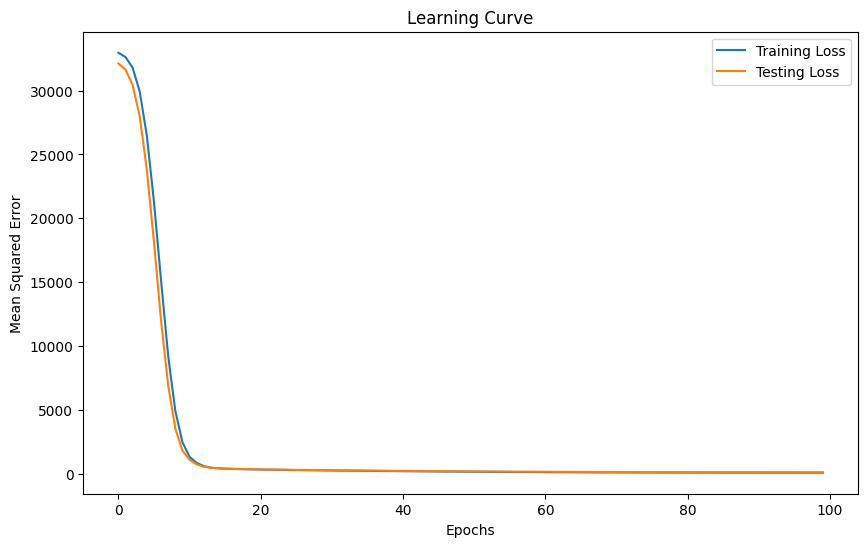

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()


### Evaluate model in Train and Test

In [29]:
model.evaluate(xtrain, ytrain)

50/50 [==============================] - 0s 2ms/step - loss: 87.8266 - mae: 7.4352


[87.82656860351562, 7.435247421264648]

In [30]:
model.evaluate(xtest, ytest)

13/13 [==============================] - 0s 2ms/step - loss: 125.3197 - mae: 8.8772


[125.31973266601562, 8.87724781036377]

### predict the result for train and test

In [31]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

13/13 [==============================] - 0s 2ms/step


In [32]:
ypred_tr[0:5]

array([[-361.91953 ],
       [   4.820813],
       [ -48.615402],
       [-233.47081 ],
       [-208.47318 ]], dtype=float32)

In [33]:
ytrain.head()

,y
1490,-356.925477
965,8.515626
1216,-44.958454
500,-218.346383
403,-211.774828


In [34]:
ypred_ts[0:5]

array([[ -11.333159],
       [  97.854774],
       [ 273.3652  ],
       [-176.82832 ],
       [-209.71817 ]], dtype=float32)

In [35]:
ytest.head()

,y
541,-7.918092
1211,91.934687
1862,259.032574
1094,-191.626509
465,-196.558008


### get the r2_score for train and test

In [36]:
from sklearn.metrics import r2_score

In [37]:
r2_score(ytrain, ypred_tr)

0.9973425191058604

In [38]:
r2_score(ytest,ypred_ts)

0.9961196876055608

### In regession if r2 scores>= 0.8 then you have created good model 